<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;"><a href="http://www.editorialuoc.cat/mineria-de-datos" target="_blank">Minería de datos: Modelos y algoritmos</a></p>
<p style="margin: 0; text-align:right;">Estudios de Informática, Multimedia y Telecomunicación</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Universitat Oberta de Catalunya (<b>UOC</b>)</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# Creación de una red neuronal para clasificación del conjunto de datos FASHION-MNIST

En este ejemplo veremos la creación de una red neuronal, mediante el uso de Python y la librería `keras`, para realizar una clasificación de objetos a partir del conjunto de datos [Fashion-MNITS](http://yann.lecun.com/exdb/mnist/). 

## 1. Carga de librerías y datos

In [1]:
!pip install keras

You should consider upgrading via the '/home/xavier/anaconda3/bin/python -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import keras
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Activation, Dropout, MaxPooling2D, BatchNormalization
import matplotlib.pyplot as plt

Descarga el conjunto de datos MNIST y realiza la partición entrenamiento / test.

In [3]:
(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = fashion_mnist.load_data()

Visualización de uno de los objetos para verificar, de forma visual, el tamaño, canal de color, etc.

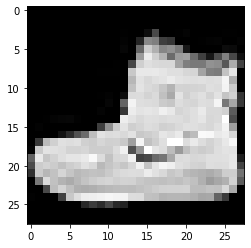

In [4]:
first_image = x_train_orig[0]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

Realizamos una conversión de formato para que las imágenes estén correctamente almacenadas en la estructura de 4 dimensiones:
- número de imagen 
- alto 
- ancho 
- canal de color (en este caso concreto, un sólo canal que corresponde a la escala de gris).

A continuación, realizamos la conversión a variable categórica de las etiquetas de las imágenes mediante la función `to_categoricaly`.

In [5]:
x_train = x_train_orig.reshape(60000,28,28,1)
x_test = x_test_orig.reshape(10000,28,28,1)

y_train = to_categorical(y_train_orig, 10)
y_test = to_categorical(y_test_orig, 10)

## 2. Creación del modelo 

A cotninuación construimos la red neuronal, que en este caso estará formada por la siguientes capas:
- Capa convolucional de 32 *kernels* de tamaño *3x3* y activación `RELU`
- Capa convolucional de 64 *kernels* de tamaño *3x3* y activación `RELU`
- Capa *Max pooling*
- Capa *Dropout* con probabilidad igual al 25%
- Capa densamente conectada con 128 neuronas y activación `RELU`
- Capa *Dropout*
- Capa de salida, formada por 10 neuronas (tenemos 10 clases en el conjunto de datos) y *softmax*

Finalmente, vemos los detalles del modelo construido (para cada capa, vemos las dimensiones de salida, número de parámetros entrenables, etc.).

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

Resumen de la información del modelo.

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Realizamos el entrenamiento sobre el conjunto de *train*.

In [8]:
batch_size = 128
n_epochs = 12

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

mfit = model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          batch_size=batch_size,
          epochs=n_epochs)

Epoch 1/12
469/469 [==============================] - 132s 282ms/step - loss: 17.9746 - accuracy: 0.1978 - val_loss: 2.4848 - val_accuracy: 0.5379
Epoch 2/12
469/469 [==============================] - 117s 249ms/step - loss: 6.5689 - accuracy: 0.3167 - val_loss: 1.2629 - val_accuracy: 0.5806
Epoch 3/12
469/469 [==============================] - 123s 262ms/step - loss: 3.3983 - accuracy: 0.3430 - val_loss: 1.4255 - val_accuracy: 0.5395
Epoch 4/12
469/469 [==============================] - 134s 285ms/step - loss: 2.3783 - accuracy: 0.3502 - val_loss: 1.5371 - val_accuracy: 0.5418
Epoch 5/12
469/469 [==============================] - 118s 251ms/step - loss: 2.0596 - accuracy: 0.3734 - val_loss: 1.5313 - val_accuracy: 0.5527
Epoch 6/12
469/469 [==============================] - 116s 247ms/step - loss: 1.9155 - accuracy: 0.3983 - val_loss: 1.4697 - val_accuracy: 0.5769
Epoch 7/12
469/469 [==============================] - 113s 240ms/step - loss: 1.8349 - accuracy: 0.4184 - val_loss: 1.3985 

## 3. Evaluación del modelo

Revisamos la información disponible del entrenamiento para poder ver su evolución.

In [9]:
print(mfit.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Creamos dos gráficas:
1. La primera, donde presentamos la evolución de la *accuracy* del model durante las 12 épocas del entrenamiento, teniendo en cuenta los datos de entrenamiento y test.
2. La segunda, donde presentamos la evolución de la función de *loss* durante el entrenamiento.

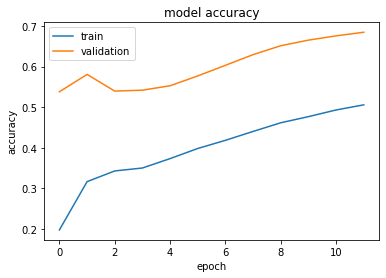

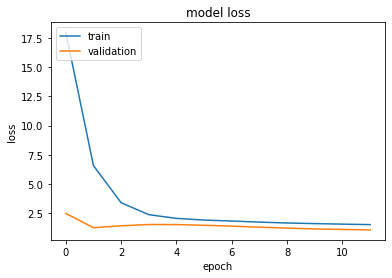

In [10]:
# Accuracy
plt.plot(mfit.history['accuracy'])
plt.plot(mfit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss
plt.plot(mfit.history['loss'])
plt.plot(mfit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Realizamos la evaluación del modelo sobre conjunto de datos de *test*.

In [11]:
# Evaluación del modelo sobre el conjunto de test
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss    :', score[0])
print('Test accuracy:', score[1])

Test loss    : 1.0742838382720947
Test accuracy: 0.6844000220298767


Mostramos, en primer lugar, el vector de predicciones para cada uno de los 4 primeros registros de test. 

Cada vector está formado por 10 números, que indican la probabilidad de este registro de pertenecer a cada una de las 10 categorías que existen en este conjunto de datos.

En segundo lugar, mostramos los valores correctos (etiquetados en el conjunto original) para estos 4 primeros registros correspondientes a las cuatro primeras imágenes del conjunto de test.

In [12]:
# Predicción de las cuatro primeras imágenes del conjunto de test
print(model.predict(x_test[:4]))

[[1.14480217e-05 1.19660235e-05 9.83990412e-06 3.15022844e-05
  5.31880301e-04 2.08382029e-02 7.96285349e-06 4.54229087e-01
  4.60096933e-02 4.78318363e-01]
 [9.99590456e-02 9.96513292e-02 1.00593142e-01 1.00256324e-01
  1.00447178e-01 9.95220765e-02 1.00438789e-01 9.97426659e-02
  9.98565778e-02 9.95327979e-02]
 [7.41981125e-07 9.98941123e-01 1.68126659e-04 1.63347431e-04
  2.81428976e-04 9.52346600e-05 3.80696360e-06 3.42579879e-04
  4.57100356e-07 3.12267753e-06]
 [1.96520105e-07 9.99319315e-01 2.53070786e-04 2.12107581e-04
  1.44716410e-04 1.91246490e-05 1.00141324e-06 4.89802587e-05
  4.08160616e-07 9.75764124e-07]]


In [13]:
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

En segundo lugar, mostramos los valores correctos (etiquetados en el conjunto original) para estos 4 primeros registros.